# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

/tmp/ipykernel_1354/2370850294.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
filename="SUSY-newsmall.csv"  #smaller 
!head -900000 SUSY.csv > SUSY-newsmall.csv #as professor said to make a smaller fra
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [7]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [3]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [4]:
N_Train=700000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


In [ ]:
#since I made a smaller version of the susy, my train set is 75% of the 900000 I have

We can train the classifier as follow:

In [5]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

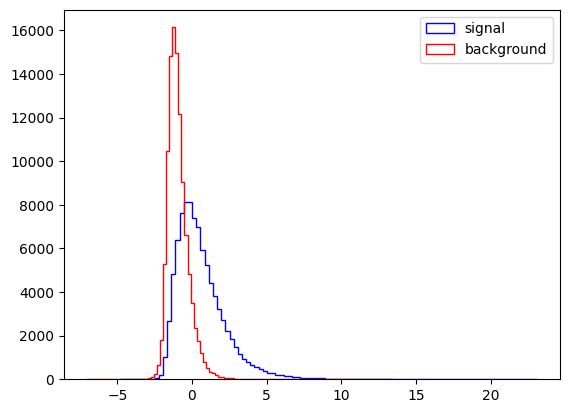

In [6]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

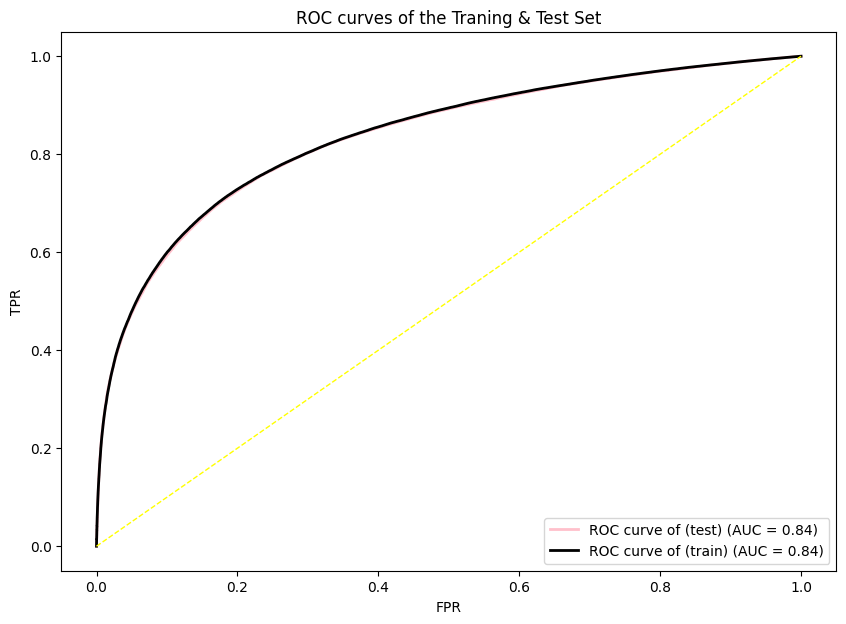

In [7]:
#part a sol
# a library to do roc curves 
from sklearn.metrics import roc_curve, auc

Train_Sample=df[:N_Train] 
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

# the model from above
Fisher=DA.LinearDiscriminantAnalysis()
Fisher.fit(X_Train, y_Train)

# this is to predict probabilities for test & training sets
test_probs = Fisher.predict_proba(X_Test)[:, 1]
train_probs = Fisher.predict_proba(X_Train)[:, 1]

# compute ROC curve and AUC for training set
fpr_train, tpr_train, _ = roc_curve(y_Train, train_probs)
roc_auc_train = auc(fpr_train, tpr_train)

# now computing ROC curve and AUC for test set
fpr_test, tpr_test, _ = roc_curve(y_Test, test_probs)
roc_auc_test = auc(fpr_test, tpr_test)

# plotting the curves 
plt.figure(figsize=(10, 7))
plt.plot(fpr_test, tpr_test, color='pink', lw=2, label='ROC curve of (test) (AUC = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='black', lw=2, label='ROC curve of (train) (AUC = %0.2f)' % roc_auc_train)
plt.plot([0, 1], [0, 1], color='yellow', lw=1, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curves of the Traning & Test Set')
plt.legend(loc="lower right")
plt.show()

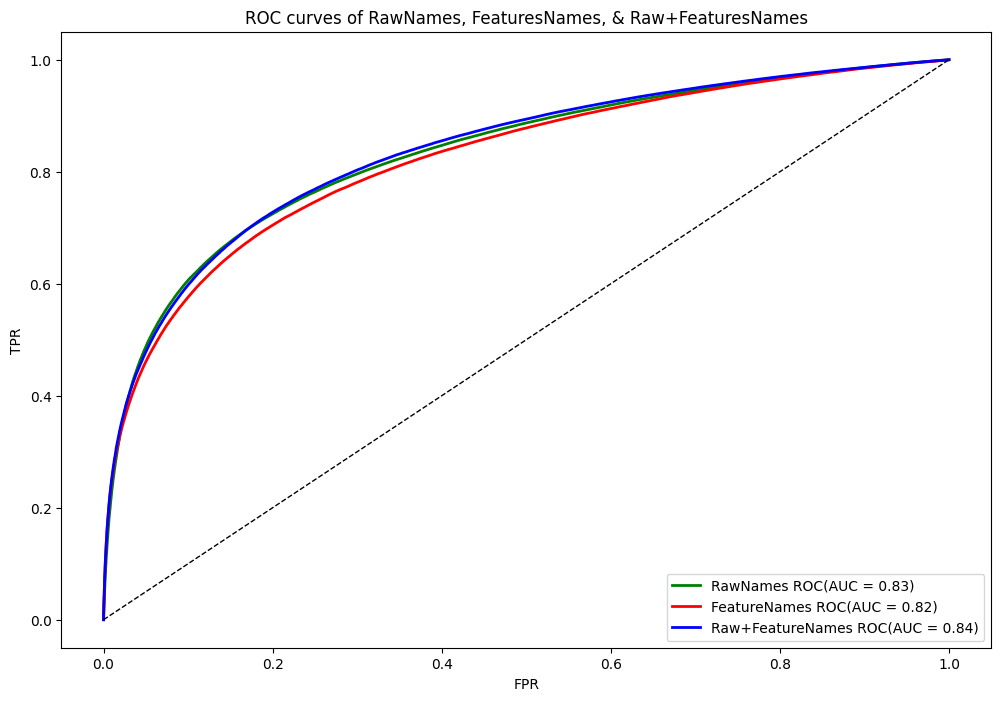

In [8]:
#part b sol
# raw features from prof
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]  

# feature from prof
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

X_RawNames = df[RawNames] # defining the raw & features on x and y
X_FeatureNames = df[FeatureNames]

# The VarNames is (raw+features) 
X_VarNames = df[VarNames[1:]] 
y_VarNames=df["signal"]

# LDA on raw, features, and raw+features
Fisher_RawNames = DA.LinearDiscriminantAnalysis()
Fisher_FeatureNames = DA.LinearDiscriminantAnalysis()
Fisher_VarNames = DA.LinearDiscriminantAnalysis() 

# train raw, features, and raw and features
Fisher_RawNames.fit(X_RawNames, y_VarNames)
Fisher_FeatureNames.fit(X_FeatureNames, y_VarNames)
Fisher_VarNames.fit(X_VarNames, y_VarNames)

RawNames_probs = Fisher_RawNames.predict_proba(X_RawNames)[:, 1]
FeatureNames_probs = Fisher_FeatureNames.predict_proba(X_FeatureNames)[:, 1]
VarNames_probs = Fisher_VarNames.predict_proba(X_VarNames)[:, 1]

# auc + roc 
# RawNames
fpr_RawNames, tpr_RawNames, _=roc_curve(y_VarNames, RawNames_probs)
roc_auc_RawNames=auc(fpr_RawNames, tpr_RawNames)

# FeatureNames
fpr_FeatureNames, tpr_FeatureNames, _=roc_curve(y_VarNames, FeatureNames_probs)
roc_auc_FeatureNames=auc(fpr_FeatureNames, tpr_FeatureNames)

# VarNames
fpr_VarNames, tpr_VarNames, _=roc_curve(y_VarNames, VarNames_probs)
roc_auc_VarNames=auc(fpr_VarNames, tpr_VarNames)

# dimension
plt.figure(figsize=(12, 8))

plt.plot(fpr_RawNames, tpr_RawNames, color='green', lw=2, label='RawNames ROC(AUC = %0.2f)' % roc_auc_RawNames)
plt.plot(fpr_FeatureNames, tpr_FeatureNames, color='red', lw=2, label='FeatureNames ROC(AUC = %0.2f)' % roc_auc_FeatureNames)
plt.plot(fpr_VarNames, tpr_VarNames, color='blue', lw=2, label='Raw+FeatureNames ROC(AUC = %0.2f)' % roc_auc_VarNames)

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curves of RawNames, FeaturesNames, & Raw+FeaturesNames')
plt.legend(loc="lower right")
plt.show()

In [13]:
#4a The three classifiers I will use are Logistic Regression, Rnadom forest and XGBoost
#4b sol
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# defining the function
def comparison_roc_and_auc(classifier, X, y):
    plt.figure(figsize=(10, 7))
    
    for classifier in classifiers:
        classifier.fit(X, y)

        # predicting probability for the test set
        predict_prob = classifier.predict_proba(X)[:, 1]

        # to calculate the roc & auc
        fpr, tpr, _ = roc_curve(y, predict_prob)
        roc_auc = auc(fpr, tpr)

        # plot it
        plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (type(classifier).__name__, roc_auc))
        
    plt.plot([0, 1], [0, 1], color='purple', lw=1, linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('The ROC curve')
    plt.legend(loc="lower right")
    plt.show()



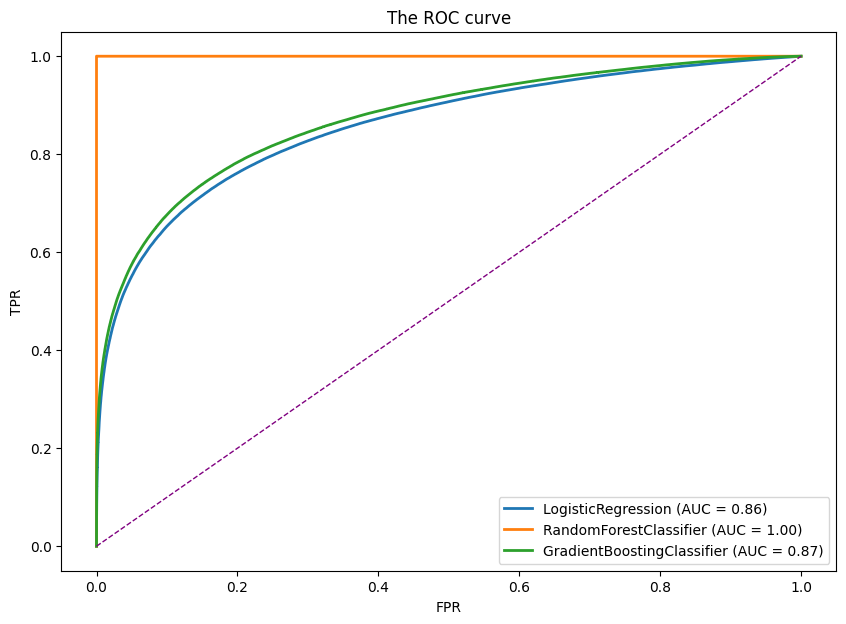

In [14]:
classifiers = [LogisticRegression(), RandomForestClassifier(), GradientBoostingClassifier()]
comparison_roc_and_auc(classifiers, X_VarNames, y_VarNames)

### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

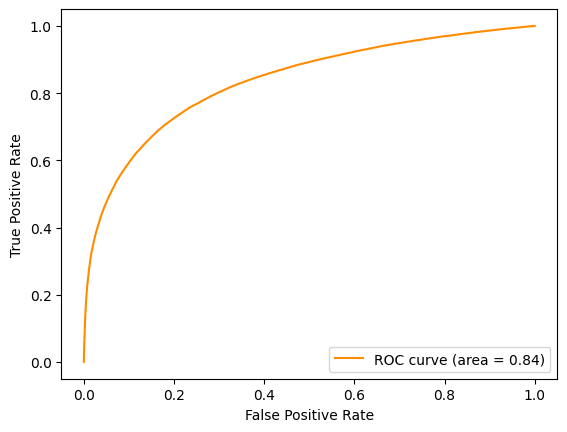

In [15]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [16]:
# 4c sol

# My three classifiers, the Random forest (AUC = 1) was the most accurate
# My Gradient Boosting (AUC = 0.87)
#My Logistic Regression (AUC = 0.86)

scenarios = [(10,100), (100,1000),(200,2000),
            (300,3000),(400,4000), (500,5000),
            (1000,10000), (10000,100000)]

def calc_significance(n_sig, n_bkg):
    return n_sig / np.sqrt(n_sig + n_bkg)

classifer_rf = RandomForestClassifier()

# initialize variables w/ the 1st scenario
first_scenario = scenarios[0]
max_sig = calc_significance(first_scenario[0], first_scenario[1])
best_scenario = first_scenario

# go through rest of the scenarios
for scenario in scenarios[1:]:
    n_sig, n_bkg = scenario
    # calc sig
    significance = calc_significance(n_sig, n_bkg)
    
    # update maximum sig & corresponding
    if significance > max_sig:
        max_sig = significance
        best_scenario = scenario

print("Best Scenario (n_sig, n_bkg):", best_scenario)
print("Maximal Significance:", max_sig)

Best Scenario (n_sig, n_bkg): (10000, 100000)
Maximal Significance: 30.15113445777636


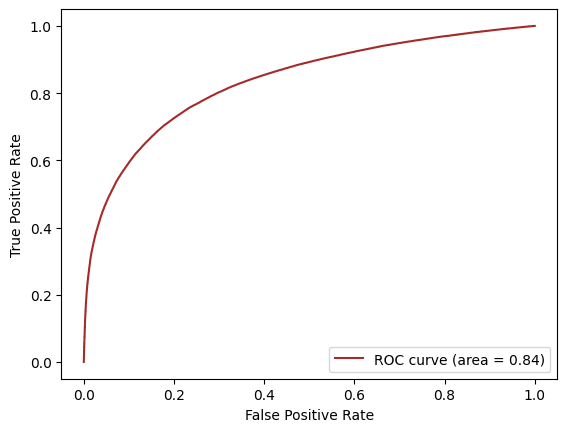

In [18]:
#No 5 sol
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='brown',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [23]:
from sklearn.metrics import (roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score,)
class_rf = RandomForestClassifier()

scenarios = [(10,100), (100,1000),(200,2000),
            (300,3000),(400,4000), (500,5000),
            (1000,10000), (10000,100000)]


def calc_significance(n_sig, n_bkg):
    return n_sig / np.sqrt(n_sig + n_bkg)

results = pd.DataFrame(
    columns=["Scenario", "TPR", "FPR", 
             "ROC AUC", "Precision", "Recall", 
             "F1 Score", "Accuracy", "Max Significance"])

